# Practical 8
## Convert text into TF IDF vectors.

In [1]:
from nlp_lib import *

### Loading Dataset and Analyzing it 

In [2]:
df=pd.read_csv("Ecommerce_data.csv")

In [3]:
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [4]:
df.columns

Index(['Text', 'label'], dtype='object')

In [5]:
df.shape

(24000, 2)

In [6]:
df.label.value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [7]:
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


### Label Mapping Of Dataset's Target Value

In [8]:
df["Label_map"]=df["label"].map({"Household":0,"Electronics":1,"Clothing & Accessories":2,"Books":3})

In [9]:
df.head()

,Text,label,Label_map
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


### Importing Different Classifiers for Model Training

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import *
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 

### Splitting Data into Training & Testing Dataset

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df['Text'],
                                                    df.Label_map,
                                                    test_size=0.2,
                                                    random_state=2022,
                                                    stratify=df.Label_map)

In [12]:
print(x_train.shape, x_test.shape)

(19200,) (4800,)


In [13]:
x_train.head()

15820    IRIS Furniture Children Deluxe Spiderman Toddl...
23276                     Rupa Thermocot Men's Thermal Top
4959     Kuchipoo Front Open Kids Thermal Top & Pyjama ...
15245    Spread Spain Metallic Gold Bar Trolley/Kitchen...
5104     Adulthood Is a Myth: A Sarah's Scribbles Colle...
Name: Text, dtype: object

In [14]:
y_train.value_counts()

Label_map
0    4800
2    4800
3    4800
1    4800
Name: count, dtype: int64

In [15]:
x_test.head()

20706    Lal Haveli Designer Handmade Patchwork Decorat...
19008    tirupur fashion biz Girls and Kids Solid Cotto...
14810    Modern Linguistics: An Introduction About The ...
2451     AmazonBasics Apple Certified 30-Pin to USB Cab...
6296     The Marine Corps Martial Arts Program: The Com...
Name: Text, dtype: object

In [16]:
y_test.value_counts()

Label_map
0    1200
2    1200
3    1200
1    1200
Name: count, dtype: int64

### Training Model on Raw Dataset

In [20]:
classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(),#n_neighbors=10,metric="cosine"),#n_neighbors=3,metric="euclideian" weights='distance', algorithm='auto', p=2
    'DecisionTreeClassifier': DecisionTreeClassifier(),#criterion='entropy', max_depth=10, min_samples_split=4
    'LogisticRegression': LogisticRegression(),
    'LinearSVM': LinearSVC(),
    'MultinomialNB':MultinomialNB(),
    "RandomForestClassifier" :RandomForestClassifier()
}

# Loop through classifiers and train each
for name, clf in classifiers.items():
    print(f"\nTraining with {name}")
    
    # Create pipeline for each classifier
    pipeline = Pipeline([('TfIdfVectorizer', TfidfVectorizer()),('classifier', clf)])
    
    # Train the model
    pipeline.fit(x_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(x_test)
    
    # Print classification report
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred,zero_division=0))
    print(x_test[:5],y_test[:5],y_pred[:5])


Training with KNeighborsClassifier
Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.96      0.97      0.97      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.95      0.96      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800

20706    Lal Haveli Designer Handmade Patchwork Decorat...
19008    tirupur fashion biz Girls and Kids Solid Cotto...
14810    Modern Linguistics: An Introduction About The ...
2451     AmazonBasics Apple Certified 30-Pin to USB Cab...
6296     The Marine Corps Martial Arts Program: The Com...
Name: Text, dtype: object 20706    0
19008    2
14810    3
2451     1
6296     3
Name: Label_map, dtype: int64 [0 2 3 1 3]

Training with DecisionTreeClassifier
Results for DecisionTreeClassifier:
   

### Imports For Graphical Representation of Confusion Matrix

In [21]:
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

### Doing Text Pre-Processing and then Training Model again with above classifiers

In [22]:
df["Text"]=df["Text"].str.lower()

In [23]:
df['Text']=df['Text'].apply(removes_specials)

In [24]:
df['Text']=df['Text'].apply(remove_stopwords)

In [25]:
df['Text']=df['Text'].apply(tokenized_text)

In [26]:
df.head()

,Text,label,Label_map
0,"[urban, ladder, eisner, low, back, studyoffice...",Household,0
1,"[contrast, living, wooden, decorative, boxpain...",Household,0
2,"[io, crest, sypci40010, pci, raid, host, contr...",Electronics,1
3,"[isakaa, baby, socks, born, 8, years, pack, 4,...",Clothing & Accessories,2
4,"[indira, designer, womens, art, mysore, silk, ...",Clothing & Accessories,2


In [28]:
df['text']=df['Text'].apply(wordnet_lemmatizing)

In [29]:
df.head()

,Text,label,Label_map,text
0,"[urban, ladder, eisner, low, back, studyoffice...",Household,0,"[urban, ladder, eisner, low, back, studyoffice..."
1,"[contrast, living, wooden, decorative, boxpain...",Household,0,"[contrast, living, wooden, decorative, boxpain..."
2,"[io, crest, sypci40010, pci, raid, host, contr...",Electronics,1,"[io, crest, sypci40010, pci, raid, host, contr..."
3,"[isakaa, baby, socks, born, 8, years, pack, 4,...",Clothing & Accessories,2,"[isakaa, baby, sock, born, 8, year, pack, 4, 6..."
4,"[indira, designer, womens, art, mysore, silk, ...",Clothing & Accessories,2,"[indira, designer, womens, art, mysore, silk, ..."


In [30]:
df['text_join']=df['text'].apply(lambda x: " ".join(x))

In [31]:
df.head()

,Text,label,Label_map,text,text_join
0,"[urban, ladder, eisner, low, back, studyoffice...",Household,0,"[urban, ladder, eisner, low, back, studyoffice...",urban ladder eisner low back studyoffice compu...
1,"[contrast, living, wooden, decorative, boxpain...",Household,0,"[contrast, living, wooden, decorative, boxpain...",contrast living wooden decorative boxpainted b...
2,"[io, crest, sypci40010, pci, raid, host, contr...",Electronics,1,"[io, crest, sypci40010, pci, raid, host, contr...",io crest sypci40010 pci raid host controller c...
3,"[isakaa, baby, socks, born, 8, years, pack, 4,...",Clothing & Accessories,2,"[isakaa, baby, sock, born, 8, year, pack, 4, 6...",isakaa baby sock born 8 year pack 4 6 8 12 isa...
4,"[indira, designer, womens, art, mysore, silk, ...",Clothing & Accessories,2,"[indira, designer, womens, art, mysore, silk, ...",indira designer womens art mysore silk saree b...


In [32]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Make sure to use only the "preprocessed_txt" column for splitting
#X_train, X_test,
x_train, x_test, y_train, y_test = train_test_split(
    df['text_join'], 
    df.Label_map,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Label_map
)

### Training Data on Pre-processed Dataset


Training with KNeighborsClassifier
Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1200
           1       0.96      0.97      0.97      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.94      0.96      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800

20706    lal haveli designer handmade patchwork decorat...
19008    tirupur fashion biz girl kid solid cotton cycl...
14810    modern linguistics introduction author sk verm...
2451     amazonbasics apple certified 30pin usb cable a...
6296     marine corp martial art program complete comba...
Name: text_join, dtype: object 20706    0
19008    2
14810    3
2451     1
6296     3
Name: Label_map, dtype: int64 [0 2 3 1 3]


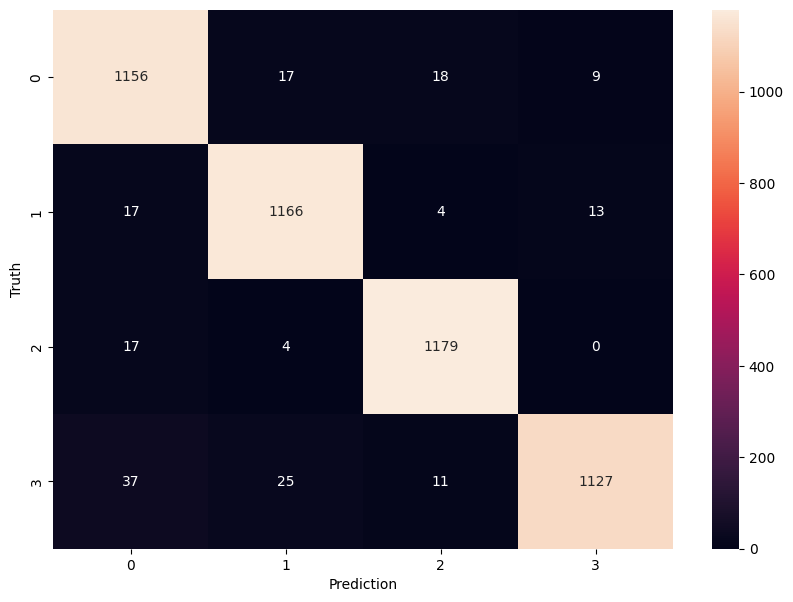


Training with DecisionTreeClassifier
Results for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1200
           1       0.96      0.95      0.95      1200
           2       0.98      0.96      0.97      1200
           3       0.96      0.97      0.97      1200

    accuracy                           0.95      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.95      0.95      0.95      4800

20706    lal haveli designer handmade patchwork decorat...
19008    tirupur fashion biz girl kid solid cotton cycl...
14810    modern linguistics introduction author sk verm...
2451     amazonbasics apple certified 30pin usb cable a...
6296     marine corp martial art program complete comba...
Name: text_join, dtype: object 20706    0
19008    2
14810    3
2451     1
6296     3
Name: Label_map, dtype: int64 [0 2 3 1 3]


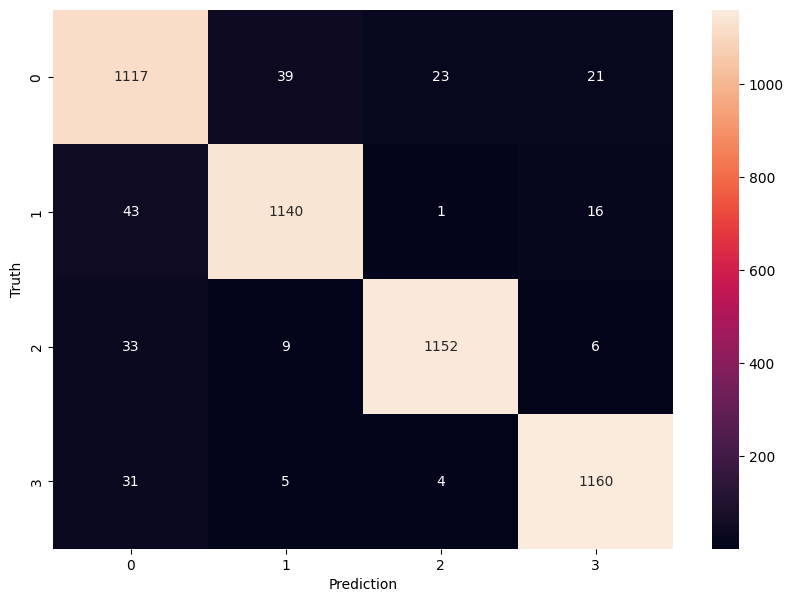


Training with LogisticRegression
Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1200
           1       0.97      0.97      0.97      1200
           2       0.98      0.99      0.99      1200
           3       0.97      0.96      0.97      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800

20706    lal haveli designer handmade patchwork decorat...
19008    tirupur fashion biz girl kid solid cotton cycl...
14810    modern linguistics introduction author sk verm...
2451     amazonbasics apple certified 30pin usb cable a...
6296     marine corp martial art program complete comba...
Name: text_join, dtype: object 20706    0
19008    2
14810    3
2451     1
6296     3
Name: Label_map, dtype: int64 [0 2 3 1 3]


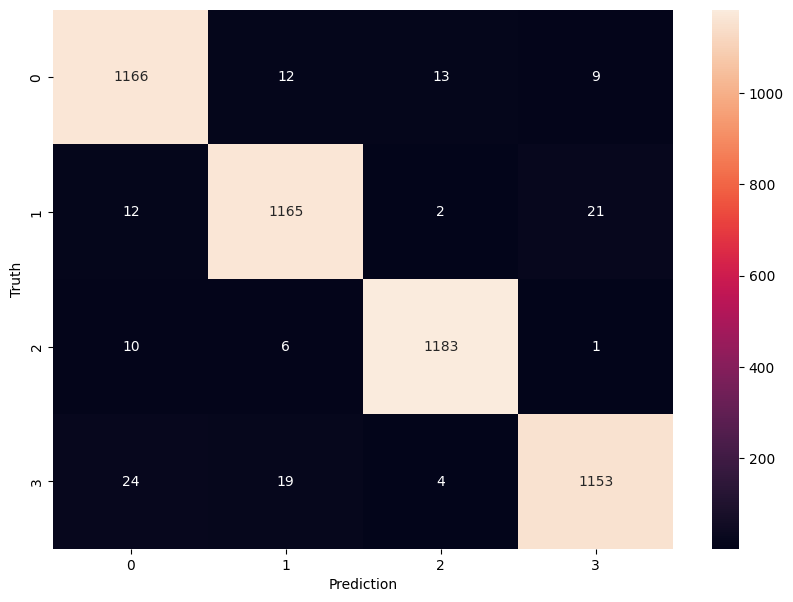


Training with LinearSVM
Results for LinearSVM:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1200
           1       0.98      0.98      0.98      1200
           2       0.99      0.99      0.99      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800

20706    lal haveli designer handmade patchwork decorat...
19008    tirupur fashion biz girl kid solid cotton cycl...
14810    modern linguistics introduction author sk verm...
2451     amazonbasics apple certified 30pin usb cable a...
6296     marine corp martial art program complete comba...
Name: text_join, dtype: object 20706    0
19008    2
14810    3
2451     1
6296     3
Name: Label_map, dtype: int64 [0 2 3 1 3]


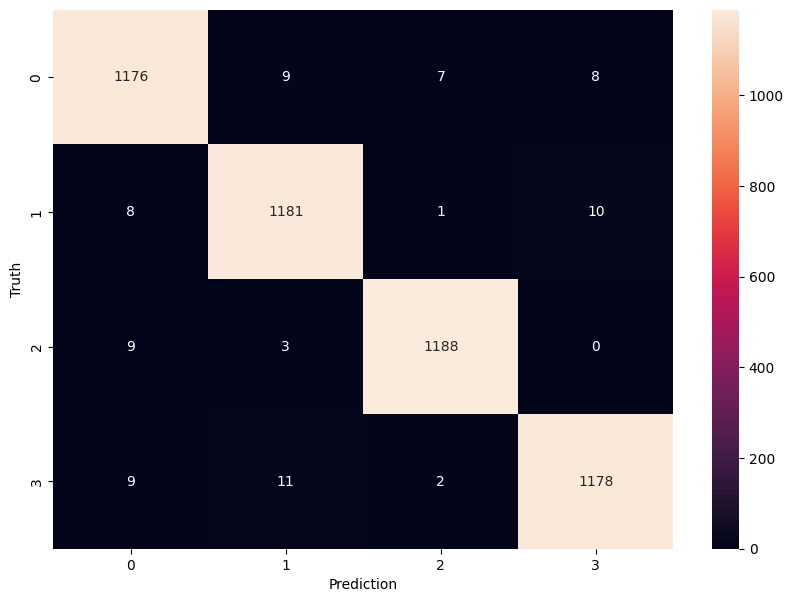


Training with MultinomialNB
Results for MultinomialNB:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1200
           1       0.96      0.97      0.96      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.93      0.95      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800

20706    lal haveli designer handmade patchwork decorat...
19008    tirupur fashion biz girl kid solid cotton cycl...
14810    modern linguistics introduction author sk verm...
2451     amazonbasics apple certified 30pin usb cable a...
6296     marine corp martial art program complete comba...
Name: text_join, dtype: object 20706    0
19008    2
14810    3
2451     1
6296     3
Name: Label_map, dtype: int64 [0 2 3 1 3]


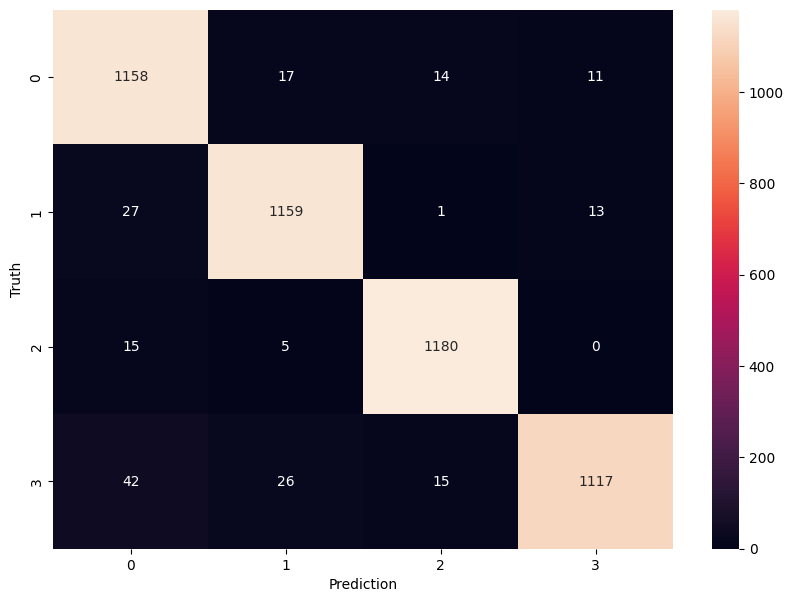


Training with RandomForestClassifier
Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.99      0.99      1200
           3       0.98      0.97      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800

20706    lal haveli designer handmade patchwork decorat...
19008    tirupur fashion biz girl kid solid cotton cycl...
14810    modern linguistics introduction author sk verm...
2451     amazonbasics apple certified 30pin usb cable a...
6296     marine corp martial art program complete comba...
Name: text_join, dtype: object 20706    0
19008    2
14810    3
2451     1
6296     3
Name: Label_map, dtype: int64 [0 2 3 1 3]


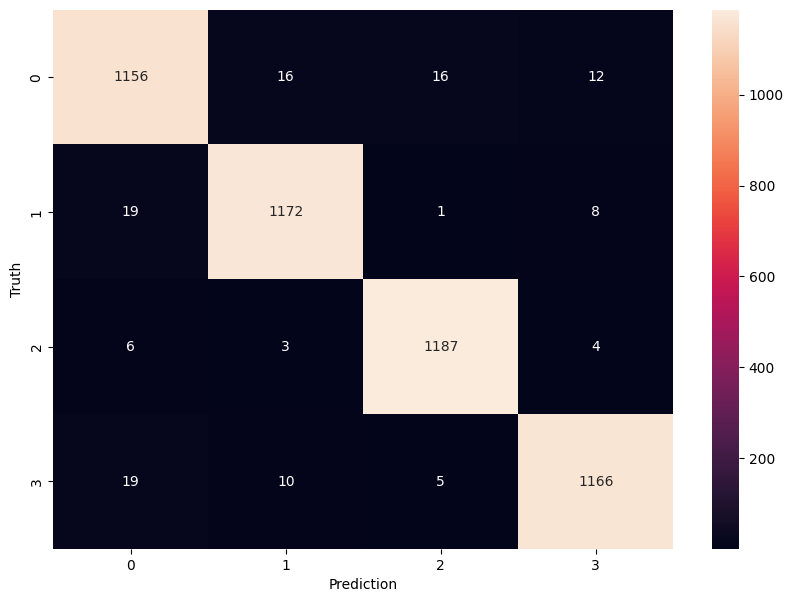

In [34]:
classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(),#n_neighbors=10,metric="cosine"),#n_neighbors=3,metric="euclideian" weights='distance', algorithm='auto', p=2
    'DecisionTreeClassifier': DecisionTreeClassifier(),#criterion='entropy', max_depth=10, min_samples_split=4
    'LogisticRegression': LogisticRegression(),
    'LinearSVM': LinearSVC(),
    'MultinomialNB':MultinomialNB(),
    "RandomForestClassifier" :RandomForestClassifier()
}

# Loop through classifiers and train each
for name, clf in classifiers.items():
    print(f"\nTraining with {name}")
    
    # Create pipeline for each classifier
    pipeline = Pipeline([
        ('TfIdfVectorizer', TfidfVectorizer()),
        ('classifier', clf)
    ])
    
    # Train the model
    pipeline.fit(x_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(x_test)
    
    # Print classification report
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred,zero_division=0))
    print(x_test[:5],y_test[:5],y_pred[:5])
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True,fmt='d')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show()